In [190]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import statistics

In [86]:
path = "dataset_comb.csv"

In [87]:
df = pd.read_csv(path)

In [88]:
df = df.sample(frac = 1)

In [89]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [90]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [91]:
df = df.drop(['id'], axis = 1)

In [92]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
12250,9438,161.083574,75.264812,0.884130,9668,109.621325,0.690973,386.763,0.792866,2.140224,Gonen
9281,5650,153.044539,47.512411,0.950590,5788,84.816292,0.674305,333.668,0.637719,3.221149,jasmine
17583,8852,164.424917,69.285681,0.906883,9025,106.163630,0.590133,382.283,0.761169,2.373144,Gonen
2021,6019,145.911839,53.410877,0.930596,6170,87.542155,0.507675,333.360,0.680624,2.731875,jasmine
1248,6331,148.318323,55.921753,0.926197,6539,89.782401,0.615078,341.567,0.681915,2.652247,jasmine
...,...,...,...,...,...,...,...,...,...,...,...
11762,8679,154.317783,72.818877,0.881665,9002,105.121102,0.700315,376.119,0.770955,2.119200,Gonen
12172,8698,155.109378,72.581012,0.883763,8957,105.236104,0.576790,378.111,0.764523,2.137052,Gonen
10126,6114,162.017752,48.565934,0.954016,6243,88.230304,0.794748,350.646,0.624881,3.336037,jasmine
8208,6654,164.277226,52.537835,0.947481,6825,92.044206,0.800433,362.687,0.635666,3.126837,jasmine


In [93]:
#min-max normalisation
#0 - jasmine & 1 - Gonen

for column in df.columns:
    if column!='Class':
        maxx = df[column].max()
        minn = df[column].min()
        for e in df[column]:
            e1 = (maxx - e)/(maxx - minn)
            df[column] = df[column].replace(e, e1)
    elif column == 'Class':
        for e in df[column]:
            if e == 'jasmine':
                df[column] = df[column].replace(e, 0)
            elif e == 'Gonen':
                df[column] = df[column].replace(e, 1)

In [94]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
12250,0.100416,0.202862,0.151346,0.284853,0.158975,0.076639,0.388609,0.390849,0.153230,0.693742,1
9281,0.593132,0.276562,0.727830,0.055780,0.619291,1.954015,0.421725,0.561301,0.365715,0.270467,0
17583,0.176639,0.172230,0.275547,0.206428,0.235259,1.954014,0.588952,0.405232,0.196641,0.602534,1
2021,0.545135,0.341952,0.605305,0.124698,0.573971,1.954015,0.752776,0.562290,0.306953,0.462060,0
1248,0.504553,0.319890,0.553148,0.139857,0.530193,1.954015,0.539393,1.630759,0.305185,0.493241,0
...,...,...,...,...,...,...,...,...,...,...,...
11762,0.199142,0.264889,0.202154,0.293351,0.237988,1.954015,0.370049,0.425020,0.183239,0.701975,1
12172,0.196670,0.257632,0.207095,0.286118,0.243327,1.954024,0.615461,0.418625,0.192048,0.694984,1
10126,0.532778,0.194298,0.705945,0.043974,0.565310,1.954015,0.182433,0.506796,0.383296,0.225478,0
8208,0.462539,0.173584,0.623440,0.066497,0.496263,1.954015,0.171139,1.630977,0.368527,0.307398,0


In [101]:
data = df.to_numpy()
data.shape

(18185, 11)

In [102]:
data_g = np.array_split(data, 7)

# Logistic Regression

In [157]:
accuracy_log_test = []
accuracy_log_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)

C:\Users\titan\Downloads\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\titan\Downloads\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\titan\Downloads\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\titan\Downloads\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\titan\Downloads\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

In [202]:
print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))

Mean accuracy for test set =  0.9869672986379864


In [203]:
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))

Mean accuracy for train set =  0.9869397846070092


# Linear Perceptron

In [161]:
accuracy_lp_test = []
accuracy_lp_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    clf = Perceptron(tol = 1e-3, random_state=0)
    clf.fit(train_data_xn, train_data_yn)
    
    test_pred_y_lp = clf.predict(test_data_xn)
    train_pred_y_lp = clf.predict(train_data_xn)
    
    acc1_lp = accuracy_score(test_data_yn, test_pred_y_lp)
    accuracy_lp_test.append(acc1_lp)
    
    acc2_lp = accuracy_score(train_data_yn, train_pred_y_lp)
    accuracy_lp_train.append(acc2_lp)

In [200]:
print("Mean accuracy for test set = ", statistics.mean(accuracy_lp_test))

Mean accuracy for test set =  0.9762997310002605


In [201]:
print("Mean accuracy for train set = ", statistics.mean(accuracy_lp_train))

Mean accuracy for train set =  0.9764640136062048


# SVM

In [164]:
accuracy_svm_test = []
accuracy_svm_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    clf = SVC(kernel = 'rbf')
    clf.fit(train_data_xn, train_data_yn)
    
    test_pred_y_svm = clf.predict(test_data_xn)
    train_pred_y_svm = clf.predict(train_data_xn)
    
    acc1_svm = accuracy_score(test_data_yn, test_pred_y_svm)
    accuracy_svm_test.append(acc1_svm)
    
    acc2_svm = accuracy_score(train_data_yn, train_pred_y_svm)
    accuracy_svm_train.append(acc2_svm)

C:\Users\titan\Downloads\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\titan\Downloads\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\titan\Downloads\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\titan\Downloads\anaconda\lib\site-packages\

In [198]:
print("Mean accuracy for test set = ", statistics.mean(accuracy_svm_test))

Mean accuracy for test set =  0.9872971804086138


In [199]:
print("Mean accuracy for train set = ", statistics.mean(accuracy_svm_train))

Mean accuracy for train set =  0.9874621915058807


# Naive Bayes

In [167]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)
    
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)
    
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)

In [196]:
print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))

Mean accuracy for test set =  0.9844377321902908


In [197]:
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for train set =  0.9846393545198554


# Fisher Linear Discriminant

In [170]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)

In [194]:
print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))

Mean accuracy for test set =  0.9840527783731036


In [195]:
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for train set =  0.9841077812982807


# Artificial Neural Networks

In [224]:
accuracy_ann_test = []
accuracy_ann_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10,), max_iter = 1000, activation = 'logistic', solver = 'adam', 
                        random_state = 1)
    
    clf.fit(train_data_xn, train_data_yn)
    
    test_pred_y_ann = clf.predict(test_data_xn)
    train_pred_y_ann = clf.predict(train_data_xn)
    
    acc1_ann = accuracy_score(test_data_yn, test_pred_y_ann)
    accuracy_ann_test.append(acc1_ann)
    
    acc2_ann = accuracy_score(train_data_yn, train_pred_y_ann)
    accuracy_ann_train.append(acc2_ann)

In [225]:
print("Mean accuracy for test set = ", statistics.mean(accuracy_ann_test))

Mean accuracy for test set =  0.987792087758206


In [226]:
print("Mean accuracy for train set = ", statistics.mean(accuracy_ann_train))

Mean accuracy for train set =  0.9876821550285966


# Box Plot

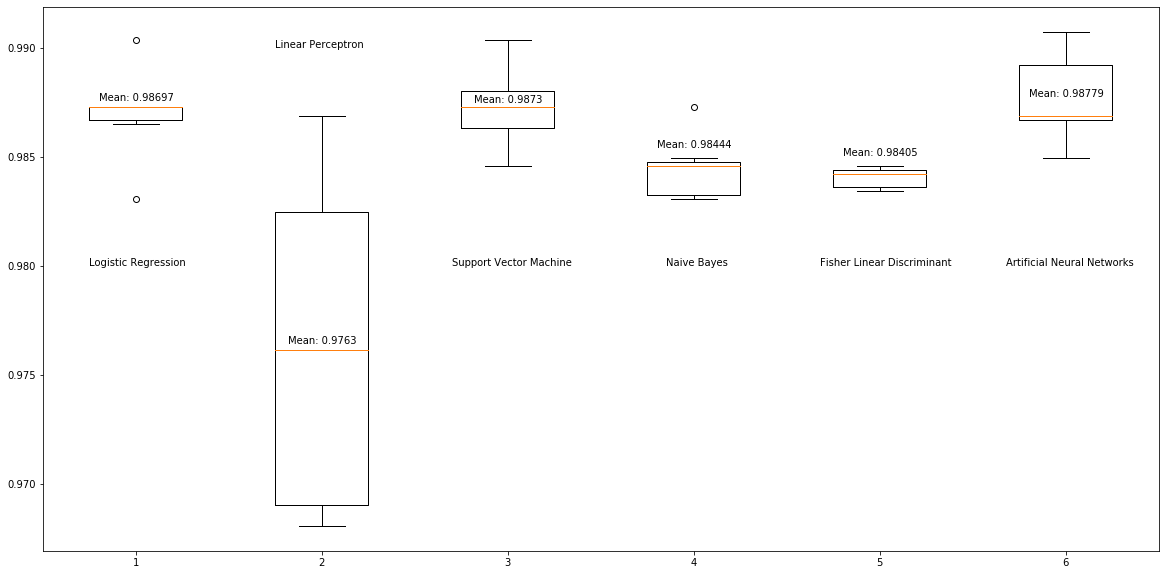

In [289]:
fig = plt.figure(figsize = (20, 10))
plt.boxplot([accuracy_log_test, accuracy_lp_test, accuracy_svm_test, accuracy_nb_test, accuracy_fl_test, accuracy_ann_test])

plt.text(0.75, 0.98, "Logistic Regression")
plt.text(0.80, statistics.mean(accuracy_log_test) + 0.0006, "Mean: " + str(round(statistics.mean(accuracy_log_test), 5)))

plt.text(1.75, 0.99, "Linear Perceptron")
plt.text(1.82, statistics.mean(accuracy_lp_test) + 0.0001, "Mean: " + str(round(statistics.mean(accuracy_lp_test), 5)))

plt.text(2.70, 0.98, "Support Vector Machine")
plt.text(2.82, statistics.mean(accuracy_svm_test) + 0.0002, "Mean: " + str(round(statistics.mean(accuracy_svm_test), 5)))

plt.text(3.85, 0.98, "Naive Bayes")
plt.text(3.80, statistics.mean(accuracy_nb_test) + 0.001, "Mean: " + str(round(statistics.mean(accuracy_nb_test), 5)))

plt.text(4.68, 0.98, "Fisher Linear Discriminant")
plt.text(4.80, statistics.mean(accuracy_fl_test) + 0.001, "Mean: " + str(round(statistics.mean(accuracy_fl_test), 5)))

plt.text(5.68, 0.98, "Artificial Neural Networks")
plt.text(5.80, statistics.mean(accuracy_ann_test), "Mean: " + str(round(statistics.mean(accuracy_ann_test), 5)))

#plt.savefig("boxPlot.jpeg")

plt.show() 